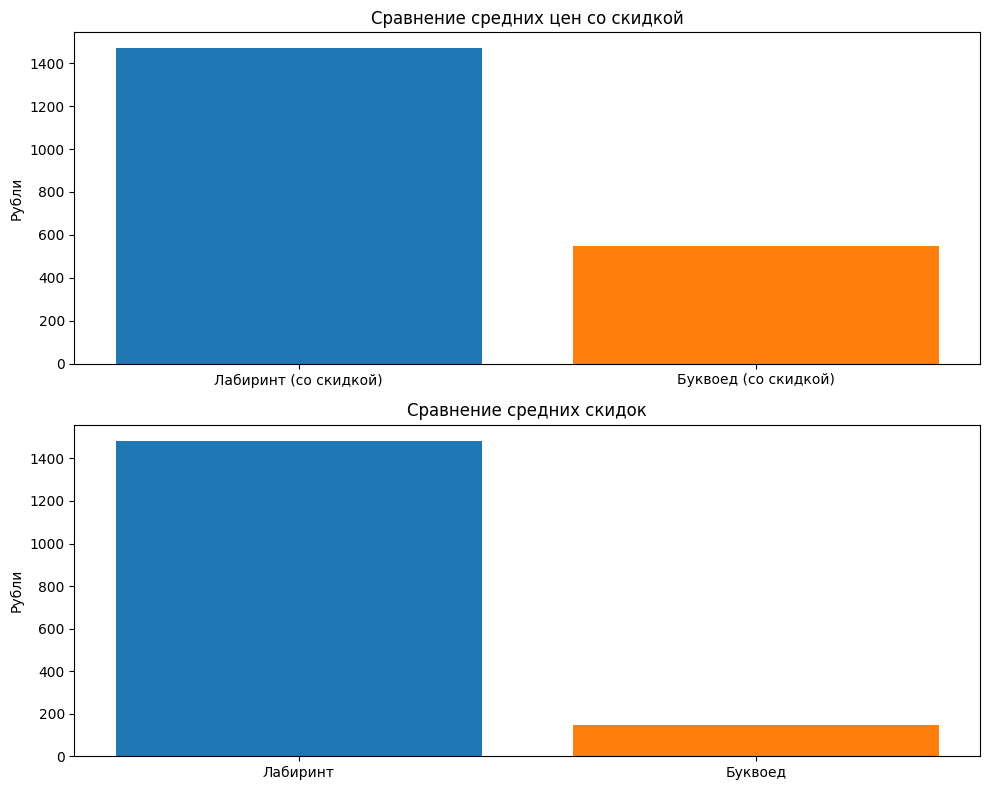


Результаты анализа:
-------------------
1. Лабиринт:
   - Средняя цена без скидки: 2954.34 ₽
   - Средняя цена со скидкой: 1470.44 ₽
   - Средняя скидка: 1483.90 ₽

2. Буквоед:
   - Средняя старая цена: 607.31 ₽
   - Средняя текущая цена: 548.77 ₽
   - Средняя скидка: 147.44 ₽

Вывод: На Буквоеде выгоднее покупать книги


In [1]:
# Сравнение цен
import pandas as pd
import matplotlib.pyplot as plt

labirint = pd.read_csv('labirint_data.csv', sep=',')
bookvoed = pd.read_csv('bookvoed_data.csv', sep=',')

def process_prices(df, platform):
    # обработка для Лабиринта
    if platform == 'labirint':
        # очистка и преобразование
        df_clean = df.dropna(subset=['Цена', 'Цена со скидкой']).copy()
        df_clean['Цена'] = pd.to_numeric(df_clean['Цена'], errors='coerce')
        df_clean['Цена со скидкой'] = pd.to_numeric(df_clean['Цена со скидкой'], errors='coerce')
        df_clean['Скидка'] = df_clean['Цена'] - df_clean['Цена со скидкой']
        return df_clean

    # обработка для Буквоеда
    elif platform == 'bookvoed':
        # очистка
        df_clean = df.dropna(subset=['Цена', 'Старая цена']).copy()
        df_clean['Цена'] = pd.to_numeric(df_clean['Цена'], errors='coerce')
        df_clean['Старая цена'] = pd.to_numeric(df_clean['Старая цена'], errors='coerce')
        df_clean['Скидка'] = df_clean['Старая цена'] - df_clean['Цена']
        return df_clean

# обработка всех данных
labirint_processed = process_prices(labirint, 'labirint')
bookvoed_processed = process_prices(bookvoed, 'bookvoed')

# расчет ср знач
results = {
    'Лабиринт': {
        'Средняя цена': labirint_processed['Цена'].mean(),
        'Средняя цена со скидкой': labirint_processed['Цена со скидкой'].mean(),
        'Средняя скидка': labirint_processed['Скидка'].mean()
    },
    'Буквоед': {
        'Средняя цена': bookvoed_processed['Старая цена'].mean(),
        'Средняя цена со скидкой': bookvoed_processed['Цена'].mean(),
        'Средняя скидка': bookvoed_processed['Скидка'].mean()
    }
}

# график и визуализация
fig, ax = plt.subplots(2, 1, figsize=(10, 8))


ax[0].bar(['Лабиринт (со скидкой)', 'Буквоед (со скидкой)'], 
        [results['Лабиринт']['Средняя цена со скидкой'], results['Буквоед']['Средняя цена со скидкой']], 
        color=['#1f77b4', '#ff7f0e'])
ax[0].set_title('Сравнение средних цен со скидкой')
ax[0].set_ylabel('Рубли')

ax[1].bar(['Лабиринт', 'Буквоед'], 
        [results['Лабиринт']['Средняя скидка'], results['Буквоед']['Средняя скидка']], 
        color=['#1f77b4', '#ff7f0e'])
ax[1].set_title('Сравнение средних скидок')
ax[1].set_ylabel('Рубли')

plt.tight_layout()
plt.show()

#результаты
print(f'''
Результаты анализа:
-------------------
1. Лабиринт:
   - Средняя цена без скидки: {results['Лабиринт']['Средняя цена']:.2f} ₽
   - Средняя цена со скидкой: {results['Лабиринт']['Средняя цена со скидкой']:.2f} ₽
   - Средняя скидка: {results['Лабиринт']['Средняя скидка']:.2f} ₽

2. Буквоед:
   - Средняя старая цена: {results['Буквоед']['Средняя цена']:.2f} ₽
   - Средняя текущая цена: {results['Буквоед']['Средняя цена со скидкой']:.2f} ₽
   - Средняя скидка: {results['Буквоед']['Средняя скидка']:.2f} ₽
''')

# определение выгоднейшей платформы
if (results['Лабиринт']['Средняя цена со скидкой'] < results['Буквоед']['Средняя цена со скидкой']) and \
   (results['Лабиринт']['Средняя скидка'] > results['Буквоед']['Средняя скидка']):
    print('Вывод: На Лабиринте выгоднее покупать книги (ниже цены и больше скидки)')
else:
    print('Вывод: На Буквоеде выгоднее покупать книги')



